In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import dill

Просмотр набора данных

In [2]:
CLEARED_PATH = '../data/flats_cleared.csv'
df = pd.read_csv(CLEARED_PATH, index_col='Код объекта')
df

,Комнатность,Ремонт,Балкон,Материал окон,Серия,Год постройки,Стены,url,Адрес,наземный паркинг,...,культуры,пешеходные бульвары,дороги,трассы,автомобильные мосты,Высота потолков,Общая площадь,этаж,всего этажей,цена
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,1,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2017.0,Панельные,https://ptz.etagi.com//realty/5757236/,Древлянка,1,...,0,0,0,0,0,2.50,30.60,1,5,2390.0
5535905,1,Косметический ремонт,Нет балкона,Пластиковые,Общ,NaN,Кирпичные,https://ptz.etagi.com//realty/5535905/,Голиковка,0,...,0,0,0,0,0,2.55,18.00,4,5,920.0
4644398,3,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,https://ptz.etagi.com//realty/4644398/,Древлянка,1,...,0,0,0,0,0,2.70,57.83,3,5,3250.0
5667276,2,Косметический ремонт,Лоджия,Пластиковые,Инд,2016.0,Монолитные,https://ptz.etagi.com//realty/5667276/,Ключевая,1,...,0,0,0,0,0,2.70,41.20,8,16,3590.0
4644417,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,https://ptz.etagi.com//realty/4644417/,Древлянка,1,...,0,0,0,0,0,2.70,84.00,3,5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671111,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,2012.0,Панельные,https://ptz.etagi.com//realty/4671111/,Ключевая,1,...,0,0,0,0,0,2.50,36.60,3,5,2900.0
2886457,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2018.0,Монолитные,https://ptz.etagi.com//realty/2886457/,Центр,0,...,0,0,0,0,0,3.00,103.30,9,9,8990.0
5193363,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,1963.0,Кирпичные,https://ptz.etagi.com//realty/5193363/,Октябрьский,1,...,0,0,0,0,0,2.50,30.60,1,5,2350.0


Распределение цен

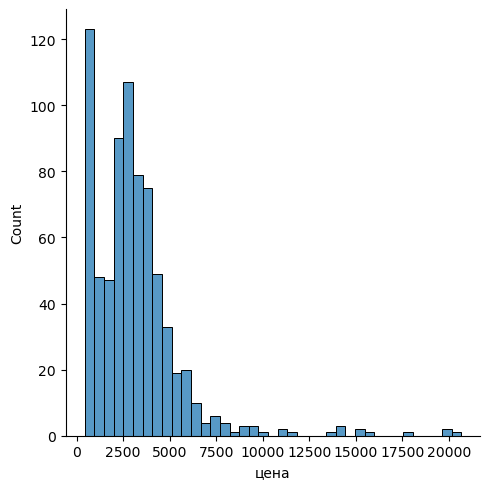

In [3]:
sns.displot(df['цена'])

Вывод "пустых" данных в процентном соотношении

In [4]:
df.isnull().mean() * 100

Комнатность               0.000000
Ремонт                    0.000000
Балкон                    0.000000
Материал окон             0.000000
Серия                     0.000000
Год постройки            22.554348
Стены                     0.000000
url                       0.000000
Адрес                     0.000000
наземный паркинг          0.000000
гостевой паркинг          0.000000
парковка отсутствует      0.000000
подземный паркинг         0.000000
гараж во дворе            0.000000
парковка                  0.000000
Двор                      0.000000
Железная дверь            0.000000
Счетчик воды              0.000000
во двор                   0.000000
на детскую площадку       0.000000
стены соседних домов      0.000000
памятники архитектуры     0.000000
культуры                  0.000000
пешеходные бульвары       0.000000
дороги                    0.000000
трассы                    0.000000
автомобильные мосты       0.000000
Высота потолков           0.135870
Общая площадь       

## Some insight

удаление url-адресов

In [5]:
train = df.copy()
train.drop(columns=['url'], inplace=True)
train

,Комнатность,Ремонт,Балкон,Материал окон,Серия,Год постройки,Стены,Адрес,наземный паркинг,гостевой паркинг,...,культуры,пешеходные бульвары,дороги,трассы,автомобильные мосты,Высота потолков,Общая площадь,этаж,всего этажей,цена
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,1,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2017.0,Панельные,Древлянка,1,0,...,0,0,0,0,0,2.50,30.60,1,5,2390.0
5535905,1,Косметический ремонт,Нет балкона,Пластиковые,Общ,NaN,Кирпичные,Голиковка,0,1,...,0,0,0,0,0,2.55,18.00,4,5,920.0
4644398,3,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,Древлянка,1,1,...,0,0,0,0,0,2.70,57.83,3,5,3250.0
5667276,2,Косметический ремонт,Лоджия,Пластиковые,Инд,2016.0,Монолитные,Ключевая,1,0,...,0,0,0,0,0,2.70,41.20,8,16,3590.0
4644417,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,Древлянка,1,1,...,0,0,0,0,0,2.70,84.00,3,5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671111,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,2012.0,Панельные,Ключевая,1,0,...,0,0,0,0,0,2.50,36.60,3,5,2900.0
2886457,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2018.0,Монолитные,Центр,0,0,...,0,0,0,0,0,3.00,103.30,9,9,8990.0
5193363,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,1963.0,Кирпичные,Октябрьский,1,0,...,0,0,0,0,0,2.50,30.60,1,5,2350.0


boxplot всех дискретных столбцов

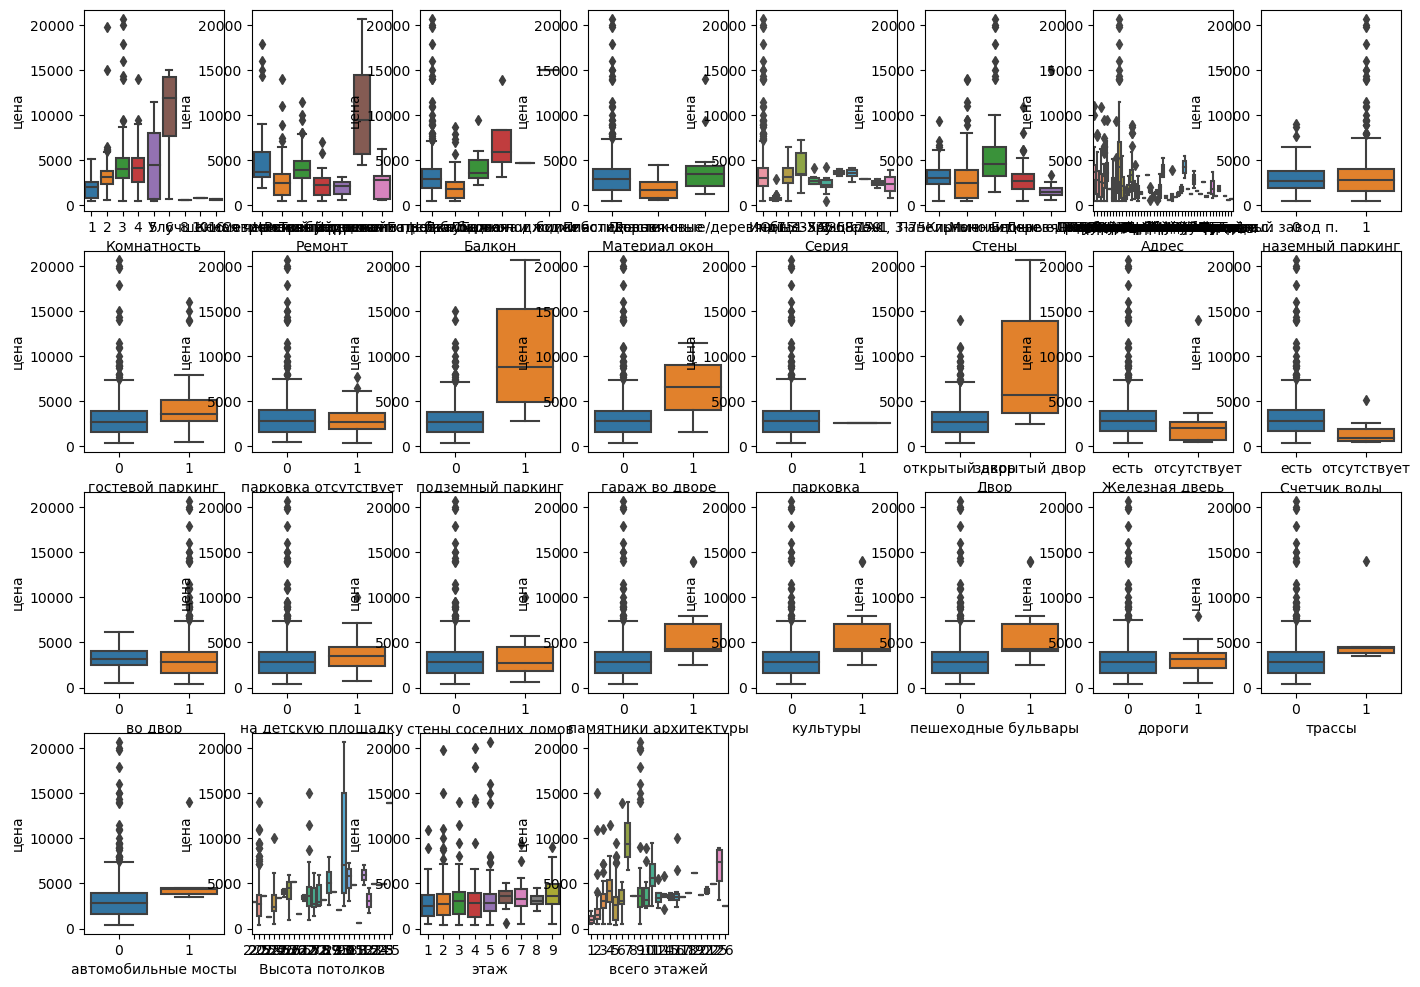

In [6]:
skip_column = ['Год постройки', 'цена', 'Общая площадь']
ncol = 1
plt.figure(figsize=(17,12))
for col in train.columns:
    if col in skip_column:
        continue
    plt.subplot(4, 8, ncol)
    sns.boxplot(data=train, x=col, y='цена')
    ncol += 1

### Очистка данных

Некоторые квартиры в датасэте - не квартиры, а комнаты. Ниже попытка вычислить эти комнаты и удалить их из набора данных

In [7]:
idx_to_drop = train[(train['Комнатность'] > 1) & (train['Общая площадь'] < 26)].index # this are rooms, not flats
train.drop(index=idx_to_drop, inplace=True)
train.shape

(718, 31)

In [8]:
#df.loc[4092393].url # do not drop this (I guess, it is flat after all)

In [9]:
ptz_address = ['Древлянка', 'Кукковка', 'Октябрьский', 'Голиковка', 
               'Перевалка', 'Центр', 'Ключевая', 'Зарека', 'Первомайский', 'Сулажгора']

In [10]:
# in address not in ptz, I will drop it anyway
idx_to_drop = train[(train['Общая площадь'] > 26) & (train['цена'] < 1000) & (train['Адрес'].isin(ptz_address))].index
#idx_to_drop.drop(4092393)
train.drop(index=idx_to_drop, inplace=True)
train.shape

(712, 31)

Распределение цен

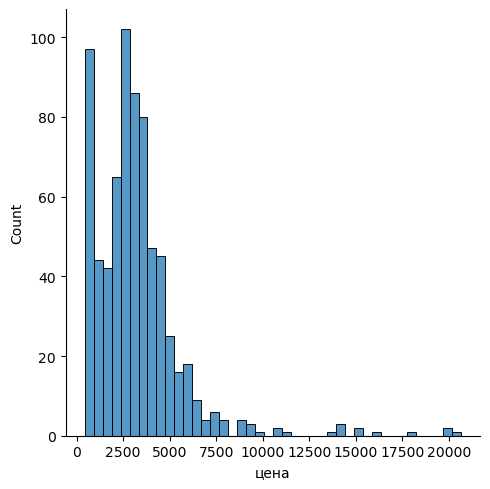

In [11]:
sns.displot(train['цена'])

Попытка обработать пропущенные данные(Эти способы не увенчались успехом)

Сравниваются графики между собой(визуально)

# Вставка NaN
Набор данных и так маленький, лучшей будет вставить пропущенные значения

#### Maybe I can handle somehow years?

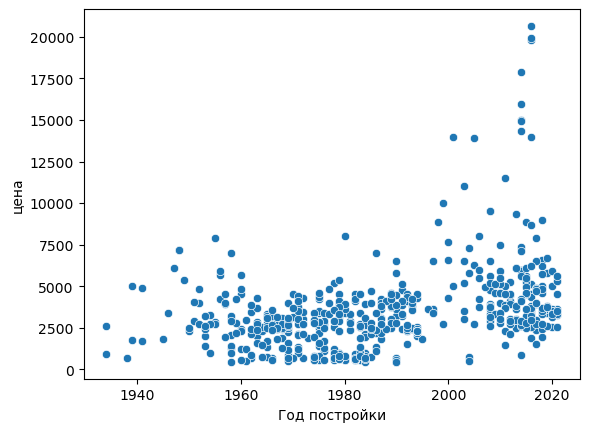

In [12]:
x=train['Год постройки']
y=train['цена']
sns.scatterplot(x=x,y=y)

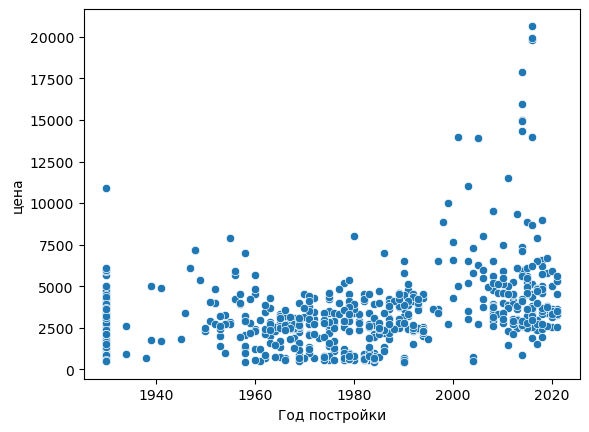

In [13]:
filled = x.fillna(1930) # just to see data on scatterplot with the rest of data
sns.scatterplot(x=filled, y=y)

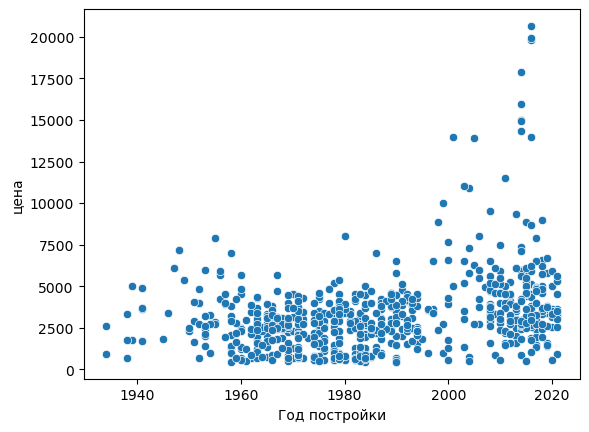

In [14]:
filled = x.fillna(method='bfill')
sns.scatterplot(x=filled, y=y)

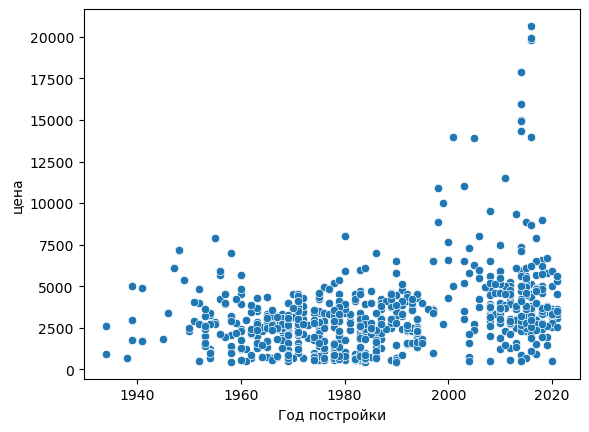

In [15]:
filled = x.fillna(method='ffill')
sns.scatterplot(x=filled, y=y)

In [16]:
#print((x>1996).sum()) #188
#(filled>1996).sum() # 242

In [17]:
train.loc[5535905]

Комнатность                                 1
Ремонт                   Косметический ремонт
Балкон                            Нет балкона
Материал окон                     Пластиковые
Серия                                     Общ
Год постройки                             NaN
Стены                               Кирпичные
Адрес                               Голиковка
наземный паркинг                            0
гостевой паркинг                            1
парковка отсутствует                        0
подземный паркинг                           0
гараж во дворе                              0
парковка                                    0
Двор                            открытый двор
Железная дверь                           есть
Счетчик воды                      отсутствует
во двор                                     1
на детскую площадку                         0
стены соседних домов                        0
памятники архитектуры                       0
культуры                          

In [18]:
filled[5535905]

2017.0

Общежитие 2017 года - это лишь вредит дате, нужен другой способ вставки года постройки

## Квартира с признаком (Серия == Общ) не может быть построена в 2017г.
Нужен более лучший способ вставки пропущенных значений

#### Вставка значений в зависимости от типа квартиры

вставляю медианные значения, в зависимости от типа квартиры

In [19]:
filled = df['Год постройки'].fillna(df.groupby('Серия')['Год постройки'].transform('median'))

распределение цен практически никак не изменилось

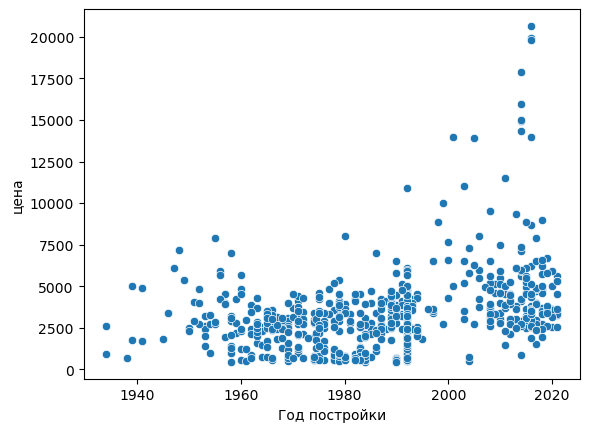

In [20]:
sns.scatterplot(x=filled, y=y)

In [21]:
filled_df = train.copy()
filled_df['Год постройки'] = filled

## Вставка пропущенного значения в "Высота потолков"
вставляется медианное значенние

In [22]:
median = filled_df['Высота потолков'].median()

In [23]:
filled_df['Высота потолков'].fillna(median, inplace=True)

In [24]:
filled_df.shape

(712, 31)

Проверяю, что после попытки сбросить NA значения, размерность данных не изменилась

In [25]:
filled_df = filled_df.dropna(axis=0)
filled_df.shape

(712, 31)

In [26]:
#print((x>1996).sum()) # 188
#(filled>1996).sum() # 189

# Поиск важных столбцов

Чтобы найти важные колонны, выполняется ANOVA тест (Дисперсионный анализ)

In [27]:
def score_ANOVA(data, col_name, min_samples_per_group=5):
    '''
    perform ANOVA test. col_name used for creating (and checking) groups with this specific column.
    if column have not enough samples per group, this column will be skipped
    return 3 lists:    
    cols_with_big_p_value - p_value < 0.01;
    cols_with_small_p_value - p_value < 0.05;
    in other cases cols_that_need_further_investigation
    '''
    cols_that_need_further_investigation = []    
    cols_with_big_p_value = []
    cols_with_small_p_value = []
    for col in data.columns:
        if col == col_name:
            continue
        df = data[[col,col_name]]
        grouped_col_price = df.groupby([col],as_index=False) 
        uniques_col_values = df[col].unique()
        if len(uniques_col_values) == 1:
            print(f'({col}) has only one value! Skipping...')
            continue
        args = [grouped_col_price.get_group(uniques_col_values[i])[col_name] for i in range(len(uniques_col_values))]
        enough_samples = [args[i] for i in range(len(args)) # score ANOVA for groups that have at least min_samples_per_group
                          if len(args[i]) >= min_samples_per_group]
        if len(enough_samples) < 2:
            print(f'{col} has not enough samples per group, skipping')
            continue
        f_val, p_val = stats.f_oneway(*enough_samples)
        if p_val < 0.05:
            cols_with_small_p_value.append([col, f_val, p_val])
        elif p_val < 0.01:
            cols_with_big_p_value.append([col, f_val, p_val])
        else:
            cols_that_need_further_investigation.append([col, f_val, p_val])
    
    cols_with_big_p_value.sort(key=lambda x:x[2], reverse=True)
    cols_with_small_p_value.sort(key=lambda x:x[2], reverse=True)
    return cols_with_big_p_value, cols_with_small_p_value, cols_that_need_further_investigation

In [28]:
weak_p, strong_p, need_investigate =  score_ANOVA(filled_df,'цена')

гараж во дворе has not enough samples per group, skipping
парковка has not enough samples per group, skipping


In [29]:
strong_p

[['трассы', 6.325766459666777, 0.012119364363364893],
 ['автомобильные мосты', 6.325766459666777, 0.012119364363364893],
 ['Материал окон', 7.006266532459412, 0.0009702757629233047],
 ['Счетчик воды', 13.58841264961971, 0.0002449335771600645],
 ['гостевой паркинг', 14.1800607316099, 0.00017987419281393168],
 ['памятники архитектуры', 14.903000554531541, 0.00012350619529324664],
 ['культуры', 14.903000554531541, 0.00012350619529324664],
 ['пешеходные бульвары', 14.903000554531541, 0.00012350619529324664],
 ['Балкон', 16.57219238043473, 9.274723077502964e-08],
 ['всего этажей', 8.701714116796884, 1.733281281911861e-13],
 ['Серия', 19.68286996280938, 2.731035394344149e-21],
 ['Стены', 32.32415887229759, 9.138397139437362e-25],
 ['Адрес', 10.461408140757927, 4.227730152375989e-25],
 ['Год постройки', 6.2735676222074925, 1.121221712180817e-27],
 ['Общая площадь', 13.220560774005751, 1.014379177330684e-29],
 ['Высота потолков', 33.94329473615298, 7.275560312339294e-36],
 ['Двор', 200.3573824

In [30]:
weak_p

[]

In [31]:
need_investigate

[['наземный паркинг', 2.661147532014957, 0.10326997908384336],
 ['парковка отсутствует', 3.3302358839725237, 0.06843716604451312],
 ['Железная дверь', 2.6154356877010363, 0.10627262271680697],
 ['во двор', 0.007134257098447874, 0.932710911606282],
 ['на детскую площадку', 0.8610206691564201, 0.3537685530200745],
 ['стены соседних домов', 0.09762276767936828, 0.7547930161805503],
 ['дороги', 0.002930747499827535, 0.956841737618592],
 ['этаж', 1.1910896997101172, 0.30149830841297354]]

In [32]:
cols_after_ANOVA = [col[0] for col in strong_p]
print(cols_after_ANOVA)

['трассы', 'автомобильные мосты', 'Материал окон', 'Счетчик воды', 'гостевой паркинг', 'памятники архитектуры', 'культуры', 'пешеходные бульвары', 'Балкон', 'всего этажей', 'Серия', 'Стены', 'Адрес', 'Год постройки', 'Общая площадь', 'Высота потолков', 'Двор', 'Комнатность', 'подземный паркинг', 'Ремонт']


# Поиск выбросов

Поиск выбросов не увенчался успехом. Вернее, выбросы были, но их удаление приводило к ухудшению результатов. Вероятно, маленький набор данных?

In [33]:
selected_columns_df = filled_df[cols_after_ANOVA]
selected_columns_df.shape

(712, 20)

boxplot, но уже после преобразований

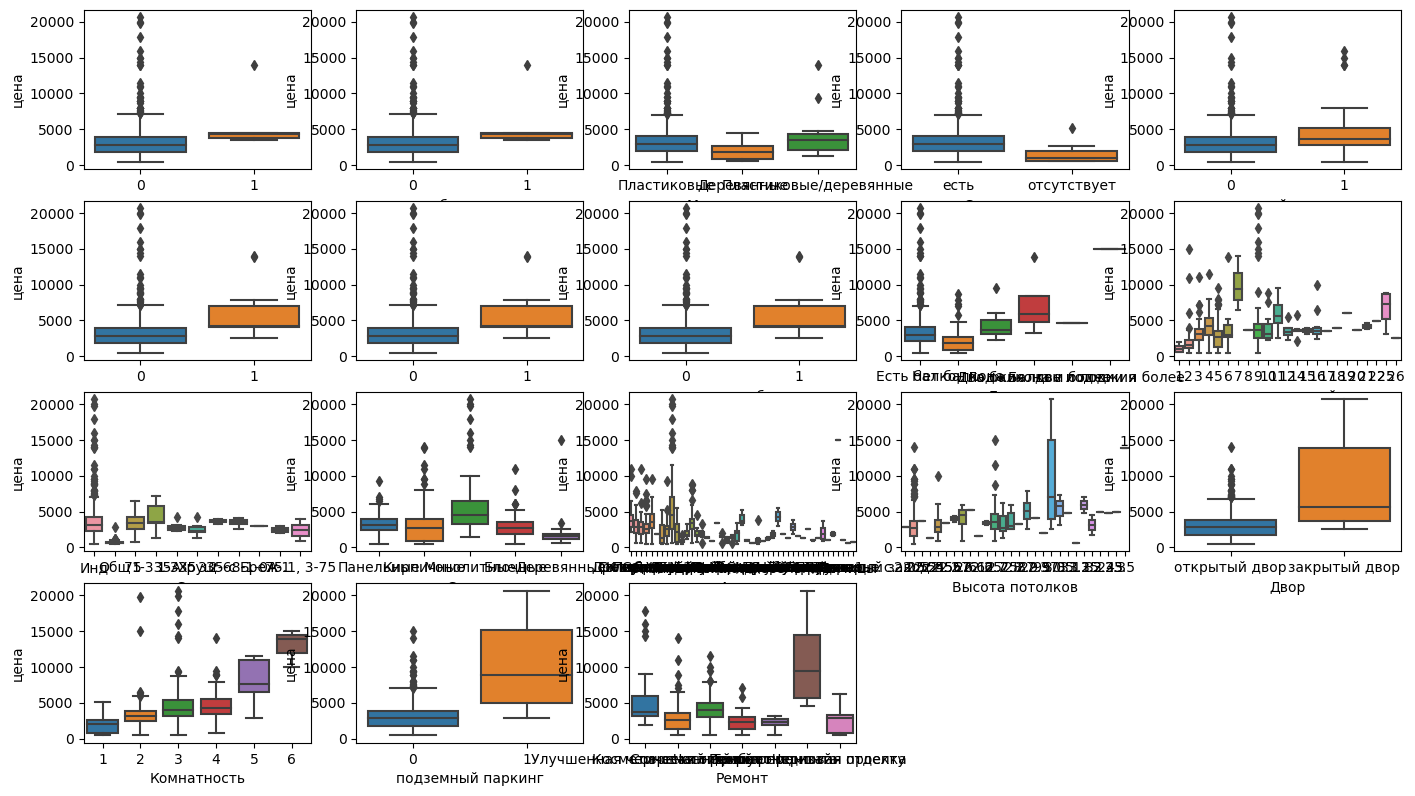

In [34]:
ncol = 1
plt.figure(figsize=(17,12))
for col in selected_columns_df:
    if col in skip_column:
        continue
    plt.subplot(5, 5, ncol)
    sns.boxplot(data=selected_columns_df, x=col, y=y)
    ncol += 1

In [35]:
y = pd.Series(df['цена'], index=selected_columns_df.index)

In [36]:
sel_df_with_y = selected_columns_df.join(y)

Непосредственный поиск граничных значений выбросов

In [37]:
Q1 = sel_df_with_y.quantile(0.25, numeric_only=True)
Q3 = sel_df_with_y.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
below_border = Q1 - 1.5*IQR
upper_border = Q3 + 1.5*IQR

In [38]:
below_border

трассы                      0.000
автомобильные мосты         0.000
гостевой паркинг            0.000
памятники архитектуры       0.000
культуры                    0.000
пешеходные бульвары         0.000
всего этажей               -1.000
Год постройки            1937.125
Общая площадь              -9.500
Высота потолков             2.500
Комнатность                -2.000
подземный паркинг           0.000
цена                    -1413.375
dtype: float64

In [39]:
upper_border

трассы                      0.000
автомобильные мосты         0.000
гостевой паркинг            0.000
памятники архитектуры       0.000
культуры                    0.000
пешеходные бульвары         0.000
всего этажей               15.000
Год постройки            2038.125
Общая площадь             106.500
Высота потолков             2.500
Комнатность                 6.000
подземный паркинг           0.000
цена                     7235.625
dtype: float64

In [40]:
idx_to_drop = sel_df_with_y[sel_df_with_y['цена'] > 7235.625].index
sel_df_with_y.drop(index=idx_to_drop, inplace=True)
sel_df_with_y.shape

(682, 21)

### Не выбрасывать выбросы других признаков
Выбросы могут оказаться полезными в данном наборе

In [41]:
# idx_to_drop = selected_columns[selected_columns['Общая площадь'] > 106.5].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [42]:
# idx_to_drop = selected_columns[selected_columns['Высота потолков'] < 2.5].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [43]:
# idx_to_drop = selected_columns[selected_columns['всего этажей'] > 15].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [44]:
# idx_to_drop = selected_columns[selected_columns['Год постройки'] < 1937].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

## Обработка адреса
Выбросить адреса, если у меня не хватает данных по ним

In [45]:
sel_df_with_y['Адрес'].value_counts()

Древлянка                          97
Кукковка                           78
Октябрьский                        66
Голиковка                          65
Перевалка                          62
Центр                              57
Ключевая                           50
Зарека                             49
Первомайский                       33
Сулажгора                          22
Кондопога                          16
Мелиоративный п.                    7
Соломенное                          7
5-й посёлок                         7
Железнодорожный                     6
Новая Вилга п.                      6
Деревянка п.                        6
Эссойла с.                          5
Кончезеро с.                        4
Великая губа с.                     3
Шуя п.                              3
Университетский городок             3
Птицефабрика                        3
Вилга д.                            2
Медвежьегорск                       2
Чална                               2
Старая Кукко

In [46]:
idx_to_drop_replace = sel_df_with_y.groupby('Адрес', as_index=False).filter(lambda x: len(x) < 17).index
adress_drop_df = sel_df_with_y.drop(index=idx_to_drop_replace)

### Looking on boxplots
after deleting bad rows

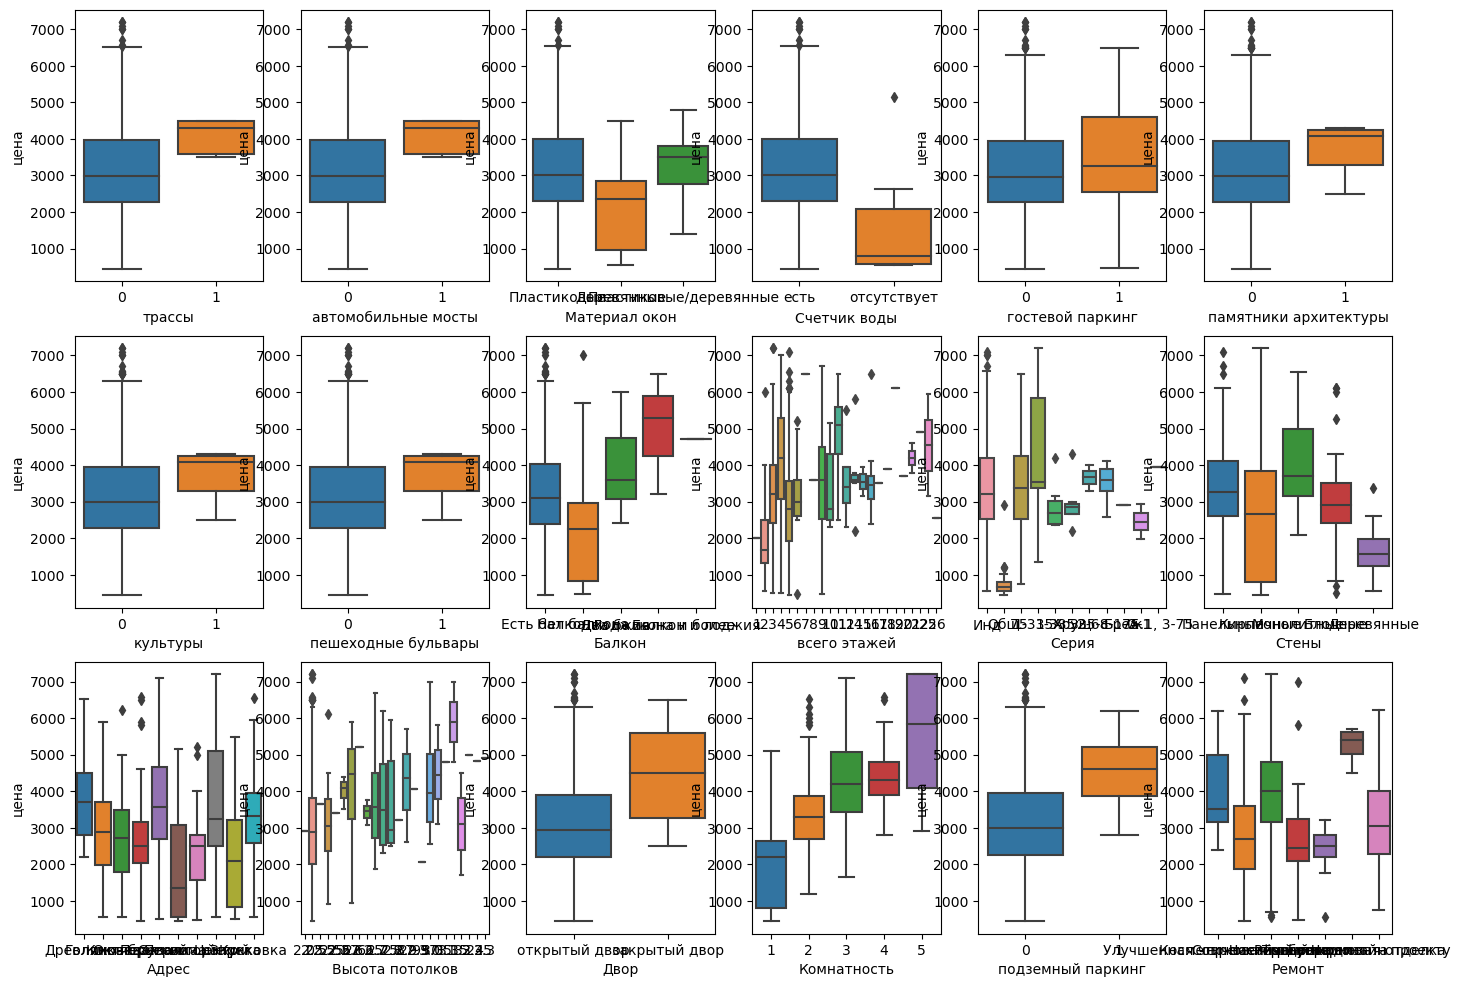

In [47]:
ncol = 1
plt.figure(figsize=(17,12))
for col in adress_drop_df:
    if col in skip_column:
        continue
    plt.subplot(3, 6, ncol)
    sns.boxplot(data=adress_drop_df, x=col, y=adress_drop_df['цена'])
    ncol += 1

### Address boxplot

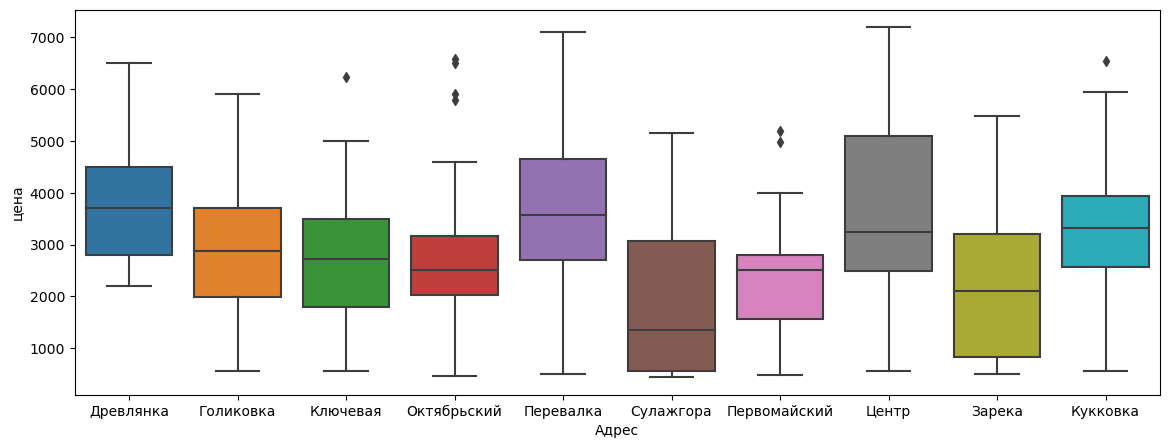

In [48]:
plt.figure(figsize=(14,5))
sns.boxplot(x=adress_drop_df['Адрес'], y=adress_drop_df['цена'])

In [49]:
adress_drop_df.shape

(579, 21)

# Prepare data

In [50]:
#adress_drop_df.to_csv('learningData.csv')

In [51]:
X = adress_drop_df.drop(columns=['цена'])
y = adress_drop_df['цена']
print(X.shape)
print(y.shape)

(579, 20)
(579,)


In [52]:
X_year_bins = X.copy()

Попытка найти лучшее возможное разбиение столбца "Год постройки". Используется разбиение на равные доли

## Binarizing year of building

In [53]:
def best_bin_split(n):
    # use random forest because it can give reasonable result without tuning
    
    #model = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=8)
    model = RandomForestRegressor(random_state=42)
    #model = LinearRegression()
    best_score = float('-inf')
    best_bin_split = 0
    best_params = None
    for n_bins in range(2,n):
        bins = np.linspace(X['Год постройки'].min(), X['Год постройки'].max(), n_bins) # 5
        year = pd.cut(X['Год постройки'], bins=bins, include_lowest=True)
        X_year_bins['Год постройки'] = year
        X_dummy = pd.get_dummies(X_year_bins)
        score = cross_val_score(model, X_dummy, y, cv=4)
        if score.mean() > best_score:
            best_score = score.mean()
            best_bin_split = n_bins
    # return None if results are better without splitting
    no_split_score = cross_val_score(model, pd.get_dummies(X), y, cv=4)
    if no_split_score.mean() > best_bin_split:
        return None
    return best_bin_split

In [54]:
bin_split = best_bin_split(8) # function return None if splitting make things worse...

In [55]:
bin_split # eventually, splitting make sense

7

### Разбиение года на 7 равных частей лучше, чем никакое разбиение вовсе,
Но, возможно, это не самое лучшее разбиение, которое может быть(split может быть не равномерным).  
на данный момент это никак не будет рассматриваться

# Использование ohe encoder для представления строковых данных в числовой вид
## И собирание всех преобразований в единый pipeline

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin
class YearsTransformer(BaseEstimator, TransformerMixin):
    """Apply binarization and ohetransform to 'Год постройки' column"""
    def __init__(self, bin_split=5):
        self.bin_split = bin_split
        self.is_fitted = False
        self.ohe = OneHotEncoder(sparse=False)

    def _remove_prefix(self, text, prefix):
        if text.startswith(prefix):
            return text[len(prefix):]
        return text

    def fit(self, X, Y=None):
        bins = np.linspace(X.min(), X.max(), self.bin_split)
        self.bins = bins
        year = pd.cut(X, bins=self.bins, include_lowest=True)
        self.ohe.fit(year.to_numpy().reshape(-1, 1))
        cols_name = self.ohe.get_feature_names_out()
        #self.cols_name = [col.removeprefix('x0_') for col in cols_name]  # only on python 3.9 or above
        self.cols_name = [self._remove_prefix(col, 'x0_') for col in cols_name]
        self.is_fitted = True
        return self

    def transform(self, X):
        assert self.is_fitted, 'call fit() method first, or use fit_transform()'
        year = pd.cut(X, bins=self.bins, include_lowest=True)
        year_ohe = self.ohe.transform(year.to_numpy().reshape(-1, 1))
        return pd.DataFrame(year_ohe, index=X.index, columns=self.cols_name)

    def inverse_transform(self, X):
        raise NotImplementedError()
    
    def fit_transform(self, X, Y=None):
        self.fit(X)
        return self.transform(X)
    
    def get_feature_names_out(self, input_features):
        return list(self.cols_name)

    # not used
    # in case I want to have LabelEncoding rather ohe
class Renovationtransformer(BaseEstimator, TransformerMixin):
    column_values = {'Черновая отделка' :0, 'Улучшенная черновая отделка' :1, 'Требует ремонта':2, 'Частичный ремонт':3,
                        'Косметический ремонт':4, 'Современный ремонт':5, 'Ремонт по дизайн проекту':6}
    def __init__(self):
        self.is_fitted = False

    def fit(self, X, Y=None):
        self.is_fitted = True
        return self

    def transform(self, X):
        assert self.is_fitted, 'call fit() method first, or use fit_transform()'
        X_labeled_renovation = X.replace(column_values)
        return X_labeled_renovation.to_frame()

    def inverse_transform(self, X):
        raise NotImplementedError()

    def fit_transform(self, X, Y=None):
        self.fit(X)
        return self.transform(X)

    def get_feature_names_out(self, input_features):
        return [input_features]

In [58]:
oheCols = ['Серия', 'Стены', 'Адрес', 'Балкон']
oheCols.append('Ремонт')
oheColsDropFirst = ['Счетчик воды', 'Двор', 'Материал окон']

In [59]:
ct = ColumnTransformer([
    ("year_build", YearsTransformer(bin_split), 'Год постройки'),
    #("renovation", Renovationtransformer(), "Ремонт"),
    ("ohe", OneHotEncoder(sparse=False), oheCols),
    ("ohe_drop", OneHotEncoder(sparse=False, drop='first'), oheColsDropFirst)
],
remainder='passthrough'
)

In [60]:
fullData = ct.fit_transform(adress_drop_df)

/home/leo/anaconda3/envs/ptzflats/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/leo/anaconda3/envs/ptzflats/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/leo/anaconda3/envs/ptzflats/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
fullData = pd.DataFrame(fullData, index=adress_drop_df.index, columns=ct.get_feature_names_out())
fullData.columns = [x[x.find('__')+2:] for x in fullData.columns]
fullData

,"(1933.999, 1948.5]","(1948.5, 1963.0]","(1963.0, 1977.5]","(1977.5, 1992.0]","(1992.0, 2006.5]","(2006.5, 2021.0]",Серия_1-335,Серия_1-335А,Серия_2-68-1-0,Серия_335-с,...,гостевой паркинг,памятники архитектуры,культуры,пешеходные бульвары,всего этажей,Общая площадь,Высота потолков,Комнатность,подземный паркинг,цена
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,30.60,2.50,1.0,0.0,2390.0
5535905,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,5.0,18.00,2.55,1.0,0.0,920.0
4644398,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,5.0,57.83,2.70,3.0,0.0,3250.0
5667276,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,41.20,2.70,2.0,0.0,3590.0
4644417,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,5.0,84.00,2.70,4.0,0.0,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891833,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,39.80,2.50,1.0,0.0,2500.0
4671111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,36.60,2.50,1.0,0.0,2900.0
5193363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,30.60,2.50,1.0,0.0,2350.0


# Теперь посмотрим на корреляцию в данных

In [62]:
x = fullData.drop(columns=['цена'])
y = fullData['цена']

## Корреляция цены

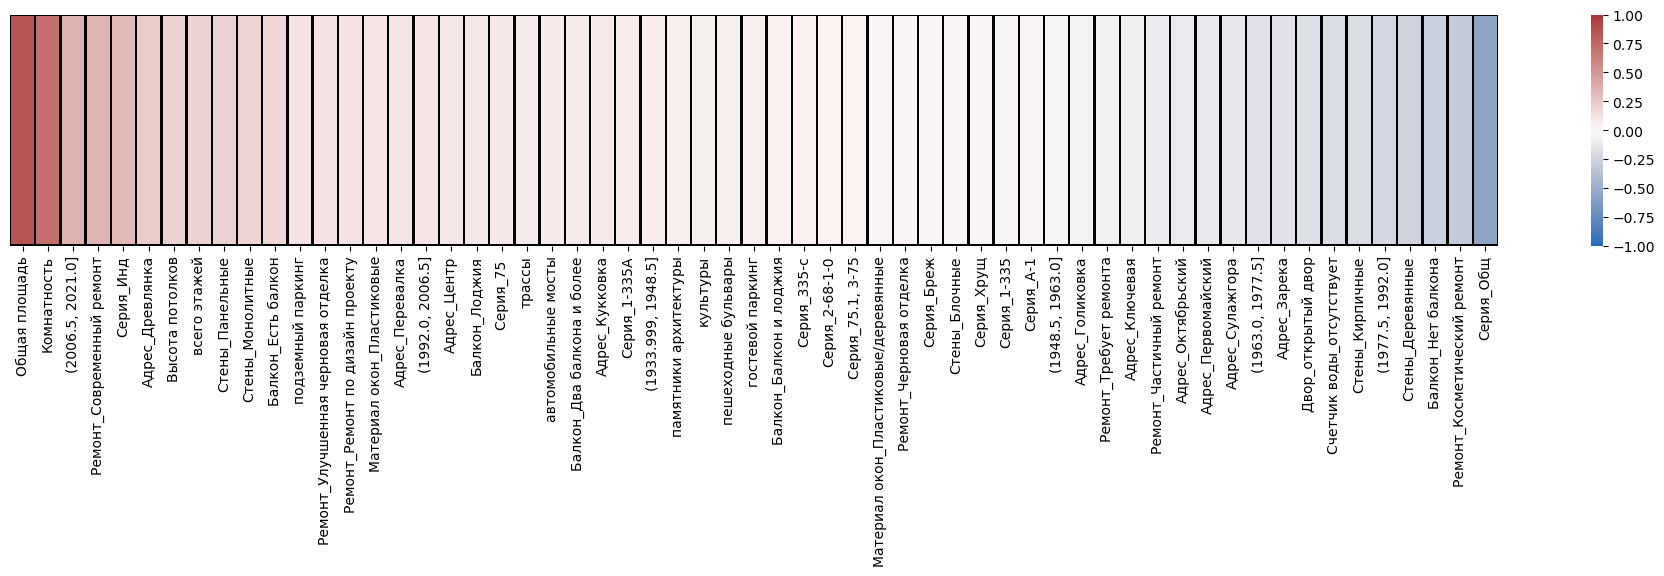

In [63]:
price_corr = x.corrwith(y, method='spearman').sort_values(ascending=False)
plt.figure(figsize=(24,3))
sns.heatmap(price_corr.to_frame().T, vmin=-1.0, vmax=1.0, linewidths=1, linecolor='black',
            cmap=sns.color_palette("vlag", as_cmap=True), center=0, yticklabels=False)

## Корреляция признаков

In [64]:
corr = x.corr(method='spearman')

смотрим только на сильные призннаки, т.к. анализировать тепловую карту целиком сложно ( полная карта есть в папке images)

### позитивная корреляция

In [65]:
high_pos_corr = corr[(corr>=0.6)].dropna(how='all')
high_pos_corr.to_numpy()[np.diag_indices_from(high_pos_corr.to_numpy())] = np.nan  # mark diagnoal elements as NaN
high_pos_corr = high_pos_corr.dropna(how='all')

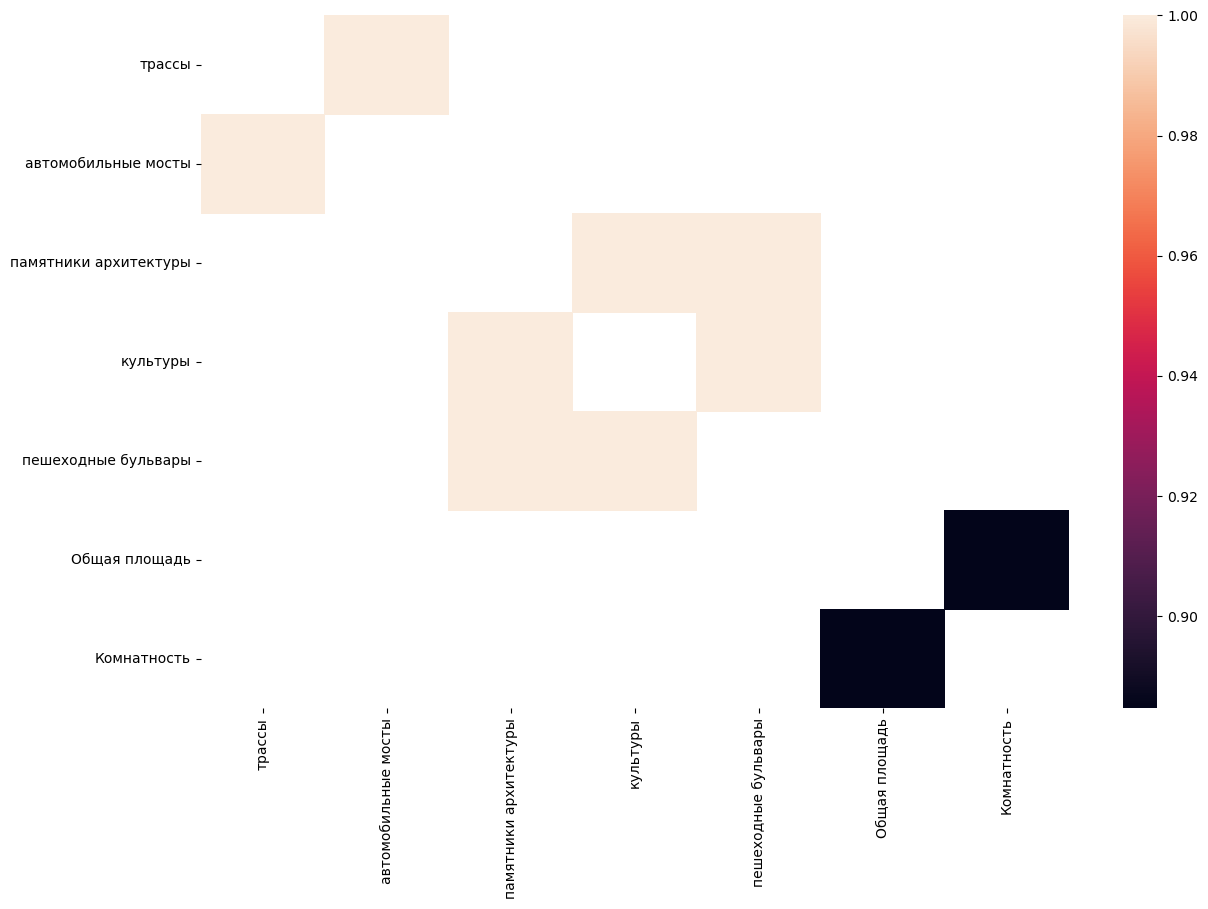

In [66]:
plt.figure(figsize=(14,9))
heatmap = sns.heatmap(high_pos_corr.loc[:, high_pos_corr.index])
fig = heatmap.get_figure()
#fig.savefig("../images/high_positive.jpg", dpi=300, bbox_inches='tight')

### Выводы

#### Высокая позитивная корреляция между:  
- трассы & автомобильные мосты;
- памятники культуры & архитектуры & пешеходные бульвары;
- комнатность & общая площадь.  
Что вполне ожидаемо

Можно объединить:  
- трассы и автомобильные мосты;
- памятники культуры, культуры и бульвары;  
  
Общая площадь и комнатность пока никак не меняю, но, возможно, можно придумать   
какой-то новый вид данных, совмещающих оба поля

###### объединяю дороги

In [67]:
fullData['вид на дороги'] = fullData['автомобильные мосты'] + fullData['трассы']  # should count as one whole.
fullData['вид на дороги'][fullData['вид на дороги'] > 1] = 1  # ohe encoding need only 0 and 1.
fullData.drop(columns=['автомобильные мосты', 'трассы'], inplace=True)

###### объединяю также и памятники культуры

In [68]:
fullData['вид на культуру'] = fullData['памятники архитектуры'] + fullData['культуры'] + fullData['пешеходные бульвары']
fullData['вид на культуру'][fullData['вид на культуру'] > 1] = 1
fullData.drop(columns=['памятники архитектуры', 'пешеходные бульвары', 'культуры'], inplace=True)

### негативная корреляция

#### Высокая негативная корреляция между:  
- Материал окон: деревянные vs. пластиковые;
- Балкон: Есть vs. нет;
- Стены: кирпичные vs. панельные;
- Двор: закрытый vs. открытый;
- Ремонт: косметический vs. современный

In [69]:
high_neg_corr = corr[corr<=-0.6].dropna(how='all')

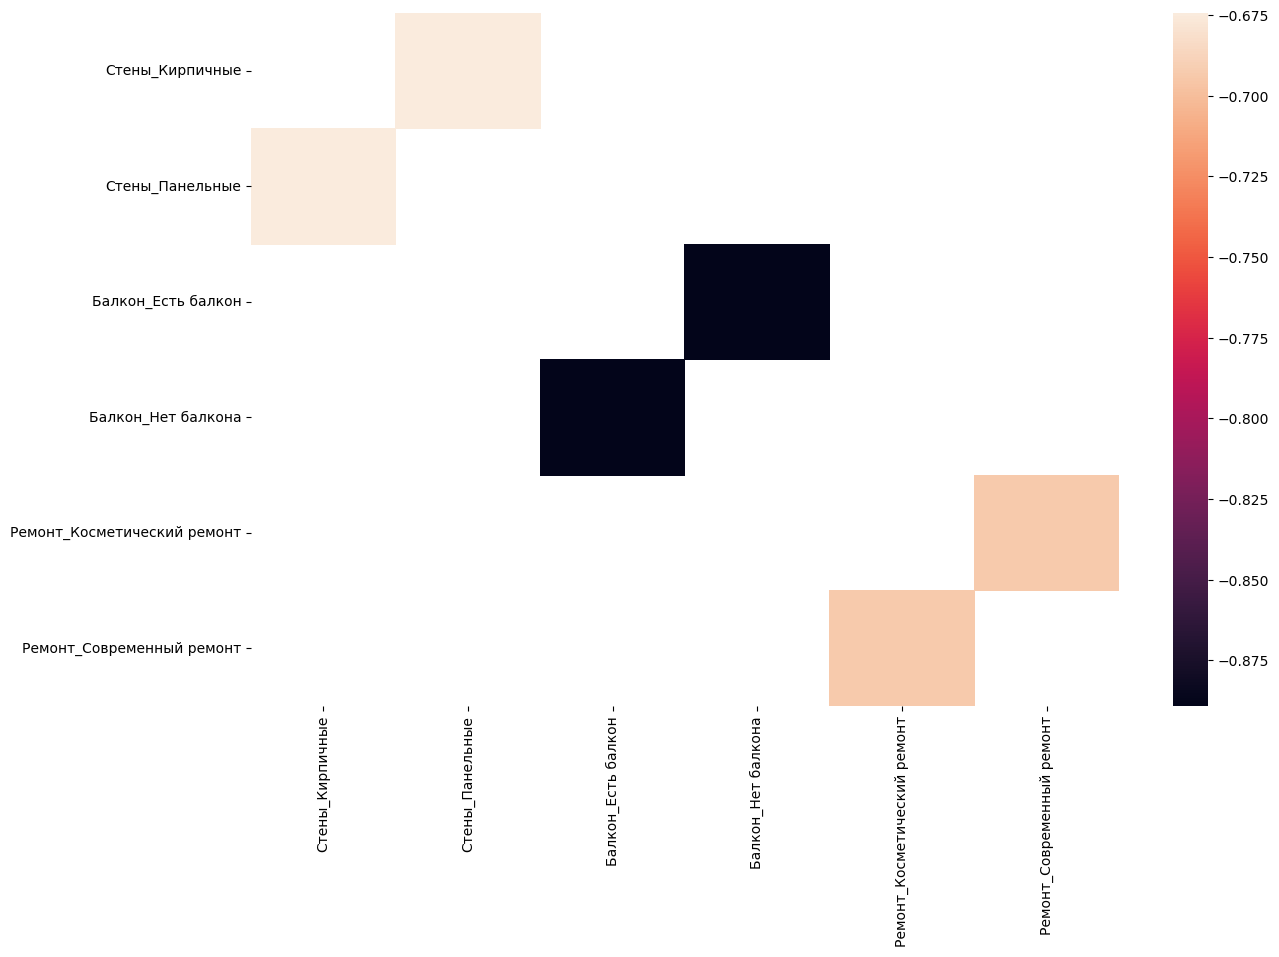

In [70]:
plt.figure(figsize=(14,9))
heatmap = sns.heatmap(high_neg_corr.loc[:, high_neg_corr.index])
fig = heatmap.get_figure()
#fig.savefig("../images/high_negiative.jpg", dpi=300, bbox_inches='tight')

С негативной корреляцией ничего не буду делать, однако отмечу:  
Информация о балконе избыточна. Можно удалить поле "Нет балкона"

In [71]:
fullData.drop(columns=['Балкон_Нет балкона'], inplace=True)

# Используя анализ выше, создаём один единый pipeline для трансформации данных

In [72]:
ct = ColumnTransformer([
    ("year_build", YearsTransformer(bin_split), 'Год постройки'),
    ("ohe", OneHotEncoder(sparse=False), oheCols),
    ("ohe_drop", OneHotEncoder(sparse=False, drop='first'), oheColsDropFirst),
],
remainder='passthrough'
)
ct.fit(X)  # X is adress_drop_df without column 'цена'

/home/leo/anaconda3/envs/ptzflats/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/leo/anaconda3/envs/ptzflats/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/leo/anaconda3/envs/ptzflats/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('year_build', YearsTransformer(bin_split=7),
                                 'Год постройки'),
                                ('ohe', OneHotEncoder(sparse=False),
                                 ['Серия', 'Стены', 'Адрес', 'Балкон',
                                  'Ремонт']),
                                ('ohe_drop',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Счетчик воды', 'Двор', 'Материал окон'])])

In [73]:
#import pickle  # use dil instead of pickle
with open('../models/pipeline.pkl', 'wb') as pipe:
    dill.dump(ct, pipe)

# Сохраняем данные

In [74]:
fullData.shape

(579, 56)

In [75]:
fullData.to_csv('../data/fullData.csv')